# IMDB DATABASE OF HOLLYWOOD ACTORS AND ACTRESSES

## by Zoe Fabre-Anderson
### Student No. 3457337

# Imports of Modules and Libraries

In [1]:
#installs of modules
#!pip install beautifulsoup4
#!pip install matplotlib
#!pip show pylot
#!pip install wordcloud
#!pip install requests
#!pip install selenium
#!pip install IPython
#!pip install numpy


import matplotlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time

#for readability
import textwrap
from IPython.display import display, HTML

# Connecting to the Website & Fetching Data

In [60]:

def fetch_all_content(url, button_xpath, new_content_xpath, role):
    # Set Chrome options to headless mode
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Enable headless mode
    chrome_options.add_argument("--window-size=1920,1080")  # Set browser resolution (window size)
    chrome_options.add_argument("--disable-gpu")  # Disable GPU acceleration
    chrome_options.add_argument("--no-sandbox")  # Resolve DevToolsActivePort file does not exist error
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")  # Disable automation control
    chrome_options.add_argument("blink-settings=imagesEnabled=false")  # Do not load images to improve speed
    
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'
    chrome_options.add_argument(f'user-agent={user_agent}')
    chrome_options.add_argument('--lang=en-US')  # Force browser language to English

    # Initialize WebDriver
    driver = webdriver.Chrome(options=chrome_options)
    # driver.set_page_load_timeout(1800)

    try:
        driver.implicitly_wait(10)
        # driver.set_page_load_timeout(2)
        driver.maximize_window()
        
        # Open target webpage
        driver.get(url)

        try:
            see_all_button = WebDriverWait(driver, 40).until(
                EC.element_to_be_clickable((By.XPATH, button_xpath))
            )

            # Click the "See all" button using JavaScript
            driver.execute_script("arguments[0].click();", see_all_button)

            # Wait for new content to load
            WebDriverWait(driver, 30).until(
                EC.presence_of_all_elements_located((By.XPATH, new_content_xpath))
                
            )

            # Scroll the page to ensure content loads
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)  # Wait for scrolling and content loading

            # Get page HTML
            page_html = driver.page_source

            print("Successfully clicked button")

        except TimeoutException:
            print("TimeoutException: Element not found or not clickable.")
            return None  # Return an empty list to continue executing other lines

    finally:
        # Close WebDriver
        driver.quit()
        # driver.close()
        
    # Parse HTML with BeautifulSoup
    soup = BeautifulSoup(page_html, 'html.parser')
    actor_previous = soup.find('div', id=f'accordion-item-{role}-previous-projects')
    movies_open = actor_previous.find_all('li', class_='ipc-metadata-list-summary-item ipc-metadata-list-summary-item--click sc-e73a2ab4-3 gOirDd')

    return movies_open


In [61]:
my_url = "https://web.archive.org/web/20240528064046/https://www.imdb.com/list/ls053501318/"
header = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36"


def getsoup(my_url, header = None):
    """Connect to Webpage"""
    try:
        page = requests.get(my_url, headers = header)
        soup = BeautifulSoup(page.text, 'html.parser')
        
        return soup
    
    except Exception as e:
        print(f"Error with fetching URL {my_url}: {e}")
        return None

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
          'Accept-Language': 'en-US'}

In [62]:
soup = getsoup(my_url, header) #beautifulsoup object
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><script charset="utf-8" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=qM_6omlu" type="text/javascript"></script>
<script charset="utf-8" src="https://web-static.archive.org/_static/js/wombat.js?v=txqj7nKC" type="text/javascript"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden"};</script>
<script src="https://web-static.archive.org/_static/js/ruffle/ruffle.js" type="text/javascript"></script>
<script type="text/javascript">
    __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.imdb.com/list/ls053501318/","20240528064046","https://web.archive.org/","web","https://web-static.archive.org/_static/",
	      "1716878446");
</script>
<link href="https://web-static.archive.org/_static/css/banner-styles.css?v=S1zqJCYt" rel="stylesheet" type="t

## Scraping the Actors' Names

In [63]:
#test scrap, scrap actor's name
scraped_actors = soup.find_all('li', class_='ipc-metadata-list-summary-item') #instead of class_ can use id_
scraped_actor = scraped_actors

sorted_actors = [actor.find('h3', class_='ipc-title__text').text for actor in scraped_actors]
sorted_actors

#len(sorted_actors) #quick way to check that we have all actors

['1. Johnny Depp',
 '2. Al Pacino',
 '3. Robert De Niro',
 '4. Kevin Spacey',
 '5. Denzel Washington',
 '6. Russell Crowe',
 '7. Brad Pitt',
 '8. Angelina Jolie',
 '9. Leonardo DiCaprio',
 '10. Tom Cruise',
 '11. John Travolta',
 '12. Arnold Schwarzenegger',
 '13. Sylvester Stallone',
 '14. Kate Winslet',
 '15. Christian Bale',
 '16. Morgan Freeman',
 '17. Keanu Reeves',
 '18. Nicolas Cage',
 '19. Hugh Jackman',
 '20. Edward Norton',
 '21. Bruce Willis',
 '22. Tom Hanks',
 '23. Charlize Theron',
 '24. Will Smith',
 '25. Sean Connery',
 '26. Keira Knightley',
 '27. Vin Diesel',
 '28. Matt Damon',
 '29. Richard Gere',
 '30. Catherine Zeta-Jones',
 '31. Clive Owen',
 '32. Mel Gibson',
 '33. George Clooney',
 '34. Jack Nicholson',
 '35. Scarlett Johansson',
 '36. Tom Hardy',
 '37. Robert Downey Jr.',
 '38. Orlando Bloom',
 '39. Ian McKellen',
 '40. Antonio Banderas',
 '41. Guy Pearce',
 '42. Samuel L. Jackson',
 '43. Sandra Bullock',
 '44. Meg Ryan',
 '45. Megan Fox',
 '46. Nicole Kidman',

In [64]:
#removie the number rankings next to actor names
name_pattern = re.compile(r'\b[A-Z][a-zA-Z]+(?:\s[A-Z][a-zA-Z\.]+)+\b')
actors = [re.search(name_pattern, sorted_actor).group() for sorted_actor in sorted_actors]

actors
#len(actors)

['Johnny Depp',
 'Al Pacino',
 'Robert De Niro',
 'Kevin Spacey',
 'Denzel Washington',
 'Russell Crowe',
 'Brad Pitt',
 'Angelina Jolie',
 'Leonardo DiCaprio',
 'Tom Cruise',
 'John Travolta',
 'Arnold Schwarzenegger',
 'Sylvester Stallone',
 'Kate Winslet',
 'Christian Bale',
 'Morgan Freeman',
 'Keanu Reeves',
 'Nicolas Cage',
 'Hugh Jackman',
 'Edward Norton',
 'Bruce Willis',
 'Tom Hanks',
 'Charlize Theron',
 'Will Smith',
 'Sean Connery',
 'Keira Knightley',
 'Vin Diesel',
 'Matt Damon',
 'Richard Gere',
 'Catherine Zeta',
 'Clive Owen',
 'Mel Gibson',
 'George Clooney',
 'Jack Nicholson',
 'Scarlett Johansson',
 'Tom Hardy',
 'Robert Downey Jr',
 'Orlando Bloom',
 'Ian McKellen',
 'Antonio Banderas',
 'Guy Pearce',
 'Samuel L. Jackson',
 'Sandra Bullock',
 'Meg Ryan',
 'Megan Fox',
 'Nicole Kidman',
 'Gerard Butler',
 'Simon Baker',
 'Cameron Diaz',
 'Katherine Heigl']

## Scraping Actors' Most Famous Movie

In [65]:
#scrap for actors famous movie
scraped_fmovies = soup.find_all('a', class_='ipc-link ipc-link--base sc-a3c468bb-0 jBQmsW')
scraped_fmovies
#len(scraped_fmovies)

[<a aria-disabled="false" class="ipc-link ipc-link--base sc-a3c468bb-0 jBQmsW" data-testid="nlib-known-for-title" href="/web/20240528064046/https://www.imdb.com/title/tt0325980/?ref_=ls_knf_1" role="button" tabindex="0">Pirates of the Caribbean: The Curse of the Black Pearl (2003)</a>,
 <a aria-disabled="false" class="ipc-link ipc-link--base sc-a3c468bb-0 jBQmsW" data-testid="nlib-known-for-title" href="/web/20240528064046/https://www.imdb.com/title/tt0070666/?ref_=ls_knf_2" role="button" tabindex="0">Serpico (1973)</a>,
 <a aria-disabled="false" class="ipc-link ipc-link--base sc-a3c468bb-0 jBQmsW" data-testid="nlib-known-for-title" href="/web/20240528064046/https://www.imdb.com/title/tt0101540/?ref_=ls_knf_3" role="button" tabindex="0">Cape Fear (1991)</a>,
 <a aria-disabled="false" class="ipc-link ipc-link--base sc-a3c468bb-0 jBQmsW" data-testid="nlib-known-for-title" href="/web/20240528064046/https://www.imdb.com/title/tt0114814/?ref_=ls_knf_4" role="button" tabindex="0">The Usual S

In [66]:
#tiddy the data
fmovies = []

for fmovie in scraped_fmovies:
    fmovie = fmovie.get_text().replace('\n', "")#removing newline tags
    fmovie = fmovie.strip(" ")#removing the spaces
    fmovies.append(fmovie)
fmovies    

['Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Serpico (1973)',
 'Cape Fear (1991)',
 'The Usual Suspects (1995)',
 'Fences (2016)',
 'Les Misérables (2012)',
 'Fight Club (1999)',
 'Maleficent (2014)',
 'Inception (2010)',
 'Top Gun (1986)',
 'Pulp Fiction (1994)',
 'Terminator 2: Judgment Day (1991)',
 'Rocky (1976)',
 'Eternal Sunshine of the Spotless Mind (2004)',
 'The Dark Knight (2008)',
 'Driving Miss Daisy (1989)',
 'The Matrix (1999)',
 'Face/Off (1997)',
 'Les Misérables (2012)',
 'Fight Club (1999)',
 'Die Hard (1988)',
 'Cast Away (2000)',
 'Monster (2003)',
 'The Fresh Prince of Bel-Air (1995–1996)',
 'The Rock (1996)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Guardians of the Galaxy (2014)',
 'Good Will Hunting (1997)',
 'Chicago (2002)',
 'Chicago (2002)',
 'Children of Men (2006)',
 'Braveheart (1995)',
 'The Ides of March (2011)',
 'Chinatown (1974)',
 'Lost in Translation (2003)',
 'Inception (2010)',
 'Iron Man (2008)'

## Seperating the Year From the Movie

In [67]:
#parse years of famous movies
myears = []
mtitles = []
for fmovie in scraped_fmovies:
    #fmovie.get_text()
    parts = fmovie.get_text().split("(") #split the title and the year apart

    mtitle = parts[0]
    
    if len(parts) > 1:
        year = parts[1].split(")")[0]
        myears.append(year)

    mtitles.append(mtitle)

myears

['2003',
 '1973',
 '1991',
 '1995',
 '2016',
 '2012',
 '1999',
 '2014',
 '2010',
 '1986',
 '1994',
 '1991',
 '1976',
 '2004',
 '2008',
 '1989',
 '1999',
 '1997',
 '2012',
 '1999',
 '1988',
 '2000',
 '2003',
 '1995–1996',
 '1996',
 '2003',
 '2014',
 '1997',
 '2002',
 '2002',
 '2006',
 '1995',
 '2011',
 '1974',
 '2003',
 '2010',
 '2008',
 '2001',
 '2001',
 '1998',
 '2000',
 '1994',
 '2009',
 '1989',
 '2007',
 '2001',
 '2006',
 '2011',
 '2001',
 '2012']

## Scraping the Role - i.e. Are They an Actor or Actress

In [68]:
#parse the for their role (whether they are an actor or actress)
#scrap for role
scraped_roles = soup.find_all('li', class_='ipc-inline-list__item sc-ada31d55-5 eWlrUt')
scraped_roles

[<li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Actor</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Producer</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Director</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Actor</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Director</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Producer</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Actor</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Producer</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Director</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Actor</li>,
 <li class="ipc-inline-list__item sc-ada31d55-5 eWlrUt" role="presentation">Producer</li>,
 <li class=

In [69]:
#parsing and tiddying
roles = []
for role in scraped_roles:
    role = role.get_text().replace('\n', "")#removing newline tags
    role = role.strip(" ")#removing the spaces

    if (role == 'Actor') or (role == 'Actress'):
        roles.append(role)

roles
#len(roles)

['Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actress',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actress',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actress',
 'Actor',
 'Actor',
 'Actress',
 'Actor',
 'Actor',
 'Actor',
 'Actress',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actress',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actor',
 'Actress',
 'Actress',
 'Actress',
 'Actress',
 'Actor',
 'Actor',
 'Actress',
 'Actress']

## Scraping Actors' Biographies

In [70]:
#scraping the biographies
scraped_bios = soup.find_all('div', class_='ipc-html-content-inner-div')
scraped_bios

[<div class="ipc-html-content-inner-div">Live :)</div>,
 <div class="ipc-html-content-inner-div">John Christopher "Johnny" Depp II was born on June 9, 1963 in Owensboro, Kentucky, to Betty Sue Palmer (née Wells), a waitress, and John Christopher Depp, a civil engineer. He was raised in Florida. He dropped out of school when he was 15, and fronted a series of music-garage bands, including one named 'The Kids'. When he married <a class="ipc-md-link ipc-md-link--entity" href="/web/20240528064046/https://www.imdb.com/name/nm0220129/?ls">Lori A. Depp</a>, he took a job as a ballpoint-pen salesman to support himself and his wife. A visit to Los Angeles, California, with his wife, however, happened to be a blessing in disguise, when he met up with actor <a class="ipc-md-link ipc-md-link--entity" href="/web/20240528064046/https://www.imdb.com/name/nm0000115/?ls">Nicolas Cage</a>, who advised him to turn to acting, which culminated in Depp's film debut in the low-budget horror film, <a class="i

In [71]:
#parsing and tiddying
bios = []
for bio in scraped_bios:
    bio = bio.get_text().replace('\n', "")#removing newline tags
    bio = bio.strip(" ")#removing the spaces
    bios.append(bio)

bios.remove('Live :)') 
bios.remove('He always is My favorite')

bios
#len(bios)

['John Christopher "Johnny" Depp II was born on June 9, 1963 in Owensboro, Kentucky, to Betty Sue Palmer (née Wells), a waitress, and John Christopher Depp, a civil engineer. He was raised in Florida. He dropped out of school when he was 15, and fronted a series of music-garage bands, including one named \'The Kids\'. When he married Lori A. Depp, he took a job as a ballpoint-pen salesman to support himself and his wife. A visit to Los Angeles, California, with his wife, however, happened to be a blessing in disguise, when he met up with actor Nicolas Cage, who advised him to turn to acting, which culminated in Depp\'s film debut in the low-budget horror film, A Nightmare on Elm Street (1984), where he played a teenager who falls prey to dream-stalking demon Freddy Krueger.In 1987 he shot to stardom when he replaced Jeff Yagher in the role of undercover cop Tommy Hanson in the popular TV series 21 Jump Street (1987). In 1990, after numerous roles in teen-oriented films, his first of a 

## Scraping Next Page URL for Each Actor

In [72]:
#scraping the biographies
scraped_urls = soup.find_all('a', class_='ipc-title-link-wrapper')#.attrs['href']
scraped_urls[0]#.attrs['href']

<a class="ipc-title-link-wrapper" href="/web/20240528064046/https://www.imdb.com/name/nm0000136/?ref_=ls_t_1" tabindex="0"><h3 class="ipc-title__text">1. Johnny Depp</h3></a>

In [78]:
#parsing and tiddying
actor_urls = []
for actor_url in scraped_urls:
    actor_url = actor_url.attrs['href']
    actor_url = actor_url.split('/web/20240528064046/')[1]#removing the part of the address i dont need
    #url = url.get_text().replace("")
    actor_urls.append(actor_url)

actor_urls
#len(urls)

['https://www.imdb.com/name/nm0000136/?ref_=ls_t_1',
 'https://www.imdb.com/name/nm0000199/?ref_=ls_t_2',
 'https://www.imdb.com/name/nm0000134/?ref_=ls_t_3',
 'https://www.imdb.com/name/nm0000228/?ref_=ls_t_4',
 'https://www.imdb.com/name/nm0000243/?ref_=ls_t_5',
 'https://www.imdb.com/name/nm0000128/?ref_=ls_t_6',
 'https://www.imdb.com/name/nm0000093/?ref_=ls_t_7',
 'https://www.imdb.com/name/nm0001401/?ref_=ls_t_8',
 'https://www.imdb.com/name/nm0000138/?ref_=ls_t_9',
 'https://www.imdb.com/name/nm0000129/?ref_=ls_t_10',
 'https://www.imdb.com/name/nm0000237/?ref_=ls_t_11',
 'https://www.imdb.com/name/nm0000216/?ref_=ls_t_12',
 'https://www.imdb.com/name/nm0000230/?ref_=ls_t_13',
 'https://www.imdb.com/name/nm0000701/?ref_=ls_t_14',
 'https://www.imdb.com/name/nm0000288/?ref_=ls_t_15',
 'https://www.imdb.com/name/nm0000151/?ref_=ls_t_16',
 'https://www.imdb.com/name/nm0000206/?ref_=ls_t_17',
 'https://www.imdb.com/name/nm0000115/?ref_=ls_t_18',
 'https://www.imdb.com/name/nm0413168

## Scraping AllTime Movies of Each Actor/Actress

In [79]:
def getmovie(soup, url = None, button_xpath = None, new_content_xpath = None, header = None, role=None):
    """function to click through to actor's main page in order to scrap all other data (movies,genres,awards)"""
    
    url_ori = "https://m.imdb.com" #base url
    name = soup.find('span', 'hero__primary-text').text #extract the actor name from soup object

    #construct the url for the actor's award page
    award_url = url_ori + soup.find_all('a', 'ipc-link ipc-link--baseAlt ipc-link--inherit-color')[1].attrs['href']
    movies_list = fetch_all_content(url, button_xpath, new_content_xpath, role) #fetch all content with url, button, and paths

    if movies_list is None:
        actor_previous = soup.find('div', id=f'accordion-item-{role.lower()}-previous-projects')
        movies_list = actor_previous.find_all('li', class_='ipc-metadata-list-summary-item ipc-metadata-list-summary-item--click sc-e73a2ab4-3 gOirDd')

    #to identify strings and rating patterns
    string_pattern = re.compile(r'[a-zA-Z\s]+')
    rate_pattern = re.compile(r'\d.\d')
    mratings = []
    filter_movies = []

    #filter movies based on rating format
    for movie in movies_list:
        com = movie.find('div', 'sc-e73a2ab4-0 kBYTwB').text
        if re.search(string_pattern, com) is None and re.search(rate_pattern, com):
            mratings.append(com)
            filter_movies.append(movie)

            
    movies = [movie.find('a', 'ipc-metadata-list-summary-item__t').text for movie in filter_movies] #extract movie titles
    years = [year.find('span', 'ipc-metadata-list-summary-item__li').text for year in filter_movies] #extract year of each movie
    
    #construct url for each movie's main page in order to get the genres
    movies_nexturls = [url_ori + movie.find('a', 'ipc-metadata-list-summary-item__t').attrs['href'] for movie in filter_movies]
    genres = []

    for movies_nexturl in movies_nexturls: #extract genres
        new_page = getsoup(movies_nexturl, header)
        genres_generator = getgenre(new_page)

        for genre in genres_generator:
            genres.append(genre)

    #dataframe to compile all extracted information
    allTime = pd.DataFrame({
        'Actor': name,
        'Movie': movies,
        'Year': years,
        'Genre': genres,
        'Rating': mratings    
    })

    return allTime, award_url

## Scraping Movie Genres

In [80]:
def getgenre(soup):
    genres_list = soup.find_all('a','ipc-chip ipc-chip--on-baseAlt')
    genre = [genre_list.find('span', 'ipc-chip__text').text for genre_list in genres_list]

    yield genre

## Scraping Actors' Awards

In [81]:
def getawards(soup):
    exp = re.compile(r'(\d{4})\s([a-zA-Z\s]+)')
    name = soup.find('h2', 'sc-a885edd8-9 dcErWY').text
    
    blocks_list = soup.find_all('div', 'ipc-metadata-list-summary-item__c')

    years = [re.match(exp, block.find('a', 'ipc-metadata-list-summary-item__t').text).group(1) for block in blocks_list]
    awards = [re.match(exp, block.find('a', 'ipc-metadata-list-summary-item__t').text).group(2) for block in blocks_list]
    titles = [block.find('span', 'ipc-metadata-list-summary-item__li awardCategoryName').text 
              if block.find('span', 'ipc-metadata-list-summary-item__li awardCategoryName') is not None else "None" for block in blocks_list]

    table = pd.DataFrame({
        'Name': name,
        'Awards': awards,
        'Tittles': titles,
        'Year': years
    })

    return table

# Storing & Loading the Data

### IMDB TOP 50 ACTORS MAIN LIST PAGE

In [82]:
#stored the scraped data for IMDB TOP 50 Actors main page
list50 = pd.DataFrame()
list50['Actor Name'] = actors
list50['Role'] = roles
list50['Biography'] = bios
list50['Famous Movie'] = mtitles#fmovies
list50['Year'] = myears
list50['URL'] = actor_urls

list50.head()

,Actor Name,Role,Biography,Famous Movie,Year,URL
0,Johnny Depp,Actor,"John Christopher ""Johnny"" Depp II was born on ...",Pirates of the Caribbean: The Curse of the Bla...,2003,https://www.imdb.com/name/nm0000136/?ref_=ls_t_1
1,Al Pacino,Actor,"Alfredo James ""Al"" 'Pacino established himself...",Serpico,1973,https://www.imdb.com/name/nm0000199/?ref_=ls_t_2
2,Robert De Niro,Actor,"One of the greatest actors of all time, Robert...",Cape Fear,1991,https://www.imdb.com/name/nm0000134/?ref_=ls_t_3
3,Kevin Spacey,Actor,"Kevin Spacey Fowler, better known by his stage...",The Usual Suspects,1995,https://www.imdb.com/name/nm0000228/?ref_=ls_t_4
4,Denzel Washington,Actor,"Denzel Hayes Washington, Jr. was born on Decem...",Fences,2016,https://www.imdb.com/name/nm0000243/?ref_=ls_t_5


In [83]:
#download the data to a local csv file
list50.to_csv('IMDB Top 50 Actors List.csv', index=False)

### STORING FOR ALL OTHER TABLES IN ONE FUNCTION

In [86]:
#fetching the page
page = getsoup(my_url)

allTime_all = pd.DataFrame()
acAwards_all = pd.DataFrame()

#loop through each row in the list50 dataframe 
for i, row in list50.iterrows():
    #extract the urls
    next_url = row['URL'] 
    role = row['Role']

    #define the Xpaths for the "see all" button and new content
    button_xpath = f"//*[@id='accordion-item-{role.lower()}-previous-projects']/div/div/span/button"  # "See all"
    new_content_xpath = f"//*[@id='accordion-item-{role.lower()}-previous-projects']/div/ul/li"

    #fetch the soup object for the actor/actresses's main page
    new_page_movie = getsoup(next_url, header)
    #get the movie data and award url using the getmovie function
    allTime, award_url = getmovie(new_page_movie, next_url, button_xpath, new_content_xpath, header, role.lower())
    #concatnenate the new movie data with existing data
    allTime_all = pd.concat([allTime_all, allTime], axis=0, ignore_index=True)
    print(f'Sucessfully concat {i+1} actors/actresse movies')

    #fetch soup object for actor/actresses's awards page
    new_page_award = getsoup(award_url, header)
    acAwards = getawards(new_page_award)
    #concatenate the new awards data with existing awards data
    acAwards_all = pd.concat([acAwards_all, acAwards], axis=0, ignore_index=True)
    print(f'Sucessfully concat {i+1} actors/actresse awards')

print("Sucessfully collect all of data we need and save in csv.file ")

#save the data to csv file
allTime_all.to_csv("All Time Movies.csv")
acAwards_all.to_csv("Actors Awards.csv")

Successfully clicked button
Sucessfully concat 1 actors/actresse movies
Sucessfully concat 1 actors/actresse awards
Successfully clicked button
Sucessfully concat 2 actors/actresse movies
Sucessfully concat 2 actors/actresse awards
Successfully clicked button
Sucessfully concat 3 actors/actresse movies
Sucessfully concat 3 actors/actresse awards
Successfully clicked button
Sucessfully concat 4 actors/actresse movies
Sucessfully concat 4 actors/actresse awards
Successfully clicked button
Sucessfully concat 5 actors/actresse movies
Sucessfully concat 5 actors/actresse awards
Successfully clicked button
Sucessfully concat 6 actors/actresse movies
Sucessfully concat 6 actors/actresse awards
TimeoutException: Element not found or not clickable.
Sucessfully concat 7 actors/actresse movies
Sucessfully concat 7 actors/actresse awards
Successfully clicked button
Sucessfully concat 8 actors/actresse movies
Sucessfully concat 8 actors/actresse awards
TimeoutException: Element not found or not cli

# Loading of CSV files

In [2]:
top50list = pd.read_csv('IMDB Top 50 Actors List.csv')
awards_csv = pd.read_csv('Actors Awards.csv')
movies_csv = pd.read_csv('All Time Movies.csv')

In [24]:
top50list.head()

,Actor Name,Role,Biography,Famous Movie,Year
0,Johnny Depp,Actor,"John Christopher ""Johnny"" Depp II was born on ...",Pirates of the Caribbean: The Curse of the Bla...,2003
1,Al Pacino,Actor,"Alfredo James ""Al"" 'Pacino established himself...",Serpico,1973
2,Robert De Niro,Actor,"One of the greatest actors of all time, Robert...",Cape Fear,1991
3,Kevin Spacey,Actor,"Kevin Spacey Fowler, better known by his stage...",The Usual Suspects,1995
4,Denzel Washington,Actor,"Denzel Hayes Washington, Jr. was born on Decem...",Fences,2016


In [92]:
allTime_all

,Actor,Movie,Year,Genre,Rating
0,Johnny Depp,Johnny Puff: Secret Mission,2024,[Animation],5.7
1,Johnny Depp,Jeanne du Barry,2023,"[Biography, Drama, History]",6.7
2,Johnny Depp,Minamata,2020,[Drama],7.2
3,Johnny Depp,Warten auf die Barbaren,2019,"[Drama, History]",5.9
4,Johnny Depp,City of Lies,2018,"[Biography, Crime, Drama]",6.5
...,...,...,...,...,...
2073,Katherine Heigl,Prinz Eisenherz,1997,"[Adventure, Fantasy, Romance]",5.1
2074,Katherine Heigl,Alarmstufe: Rot 2,1995,"[Action, Adventure, Thriller]",5.5
2075,Katherine Heigl,Daddy Cool,1994,"[Comedy, Romance]",5.5
2076,Katherine Heigl,König der Murmelspieler,1993,"[Drama, History]",7.3


In [14]:
awards_csv.rename(columns = {'Tittles':'Titles'}, inplace = True)#to fix misspelling
awards_csv#.head()

,Unnamed: 0,Name,Awards,Titles,Year
0,0,Johnny Depp,Nominee Oscar,Best Performance by an Actor in a Leading Role,2008
1,1,Johnny Depp,Nominee Oscar,Best Performance by an Actor in a Leading Role,2005
2,2,Johnny Depp,Nominee Oscar,Best Actor in a Leading Role,2004
3,3,Johnny Depp,Nominee Saturn Award,Best Actor,2008
4,4,Johnny Depp,Nominee Saturn Award,Best Actor,2005
...,...,...,...,...,...
6599,6599,Katherine Heigl,Nominee Gold Derby TV Award,Drama Supporting Actress of the Decade,2010
6600,6600,Katherine Heigl,Winner Gold Derby TV Award,Drama Supporting Actress,2009
6601,6601,Katherine Heigl,Nominee Gold Derby TV Award,Drama Supporting Actress,2007
6602,6602,Katherine Heigl,Nominee Gold Derby TV Award,Ensemble of the Year,2007


# Data Analysis

## 1. List of all available actors and actresses

In [22]:
top50list['Actor Name']

def format_names_as_html(name_series):
    #increase font size and change font style
    html_str = "<ol style='font-size:20px; font-family: Arial, sans-serif;'>"
    for name in name_series:
        html_str += f"<li>{name}</li>"
    html_str += "</ol>"
    return HTML(html_str)

# Display the formatted names as HTML
display(format_names_as_html(top50list['Actor Name']))

## 2. About the actor/actresses

In [23]:
#To learn about a specific actor

selected_actor = input('Just above is a list of 50 Actors/Actresses.\nTo find out about one of these actors, type their name as it appears.\nEnter the Name of an Actor/Actress: \n')
# Filter data for the selected actor
actor_data = top50list[top50list['Actor Name'] == selected_actor]

# Display the basic information
print(f"\nAbout {selected_actor}:\n")

biography = actor_data['Biography'].values[0]
# Wrap the text to a specific width so it is more readable
wrapped_biography = textwrap.fill(biography, width=70)


# Replace newlines with <br> tags for HTML formatting
html_biography = wrapped_biography.replace('\n', '<br>')
# Format the biography using HTML to increase text size
html_content = f"<p style='font-size:18px; font-family: Arial, sans-serif;'>{html_biography}</p>"
display(HTML(html_content))
#print(wrapped_biography)

Just above is a list of 50 Actors/Actresses.
To find out about one of these actors, type their name as it appears.
Enter the Name of an Actor/Actress: 
 Nicole Kidman



About Nicole Kidman:



## 3. All Time Movie and Years

In [27]:
#Finding a specific actor's alltime movies

selected_actor = input('\nIf you want to know more about these an Actor/Actress:\nEnter the Name of an Actor/Actress: \n')
# Filter data for the selected actor
actor_movies = movies_csv[movies_csv['Actor'] == selected_actor]


# Function to wrap text and change font size
def format_movie_info(title, year, genre, rating):
    title_wrapped = textwrap.fill(f"{title}", width=70)
    year_text = f"Year: {year}"
    genre_text = f"Genre: {genre}".replace("'", "").replace("[","").replace("]","") #*****removing [] and ''
    rating_text = f"Rating: {rating}"
    return f"<p style='font-size:16px;'><b>{title_wrapped}</b><br>{year_text}<br>{genre_text}<br>{rating_text}</p>"

html_output = f"<h2>Movies featuring {selected_actor}:</h2>"
for index, row in actor_movies.iterrows():
    movie_info = format_movie_info(row['Movie'], row['Year'], row['Genre'], row['Rating'])
    html_output += movie_info
    html_output += "<hr style='border-top: 1px dashed;'>"
display(HTML(html_output))


If you want to know more about these an Actor/Actress:
Enter the Name of an Actor/Actress: 
 Angelina Jolie


## 4. Awards to actors/actresses in different years


To Find Out How Many Awards This Actor Has Won/Been Nominated For:
Enter the Name of an Actor/Actress: 
 Kate Winslet


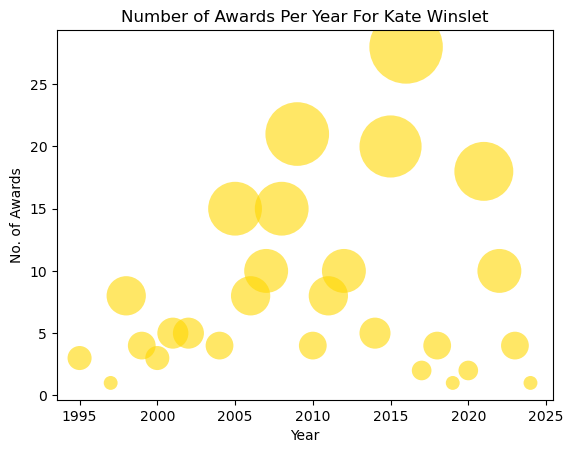

In [30]:
#Bubble Plot of actor's awards

import pandas as pd
import matplotlib.pyplot as plt
selected_actor = selected_actor = input('\nTo Find Out How Many Awards This Actor Has Won/Been Nominated For:\nEnter the Name of an Actor/Actress: \n')
actor_data = awards_csv[awards_csv['Name'] == selected_actor]

#aggregate number of awards by year
awards_by_year = actor_data.groupby('Year').size().reset_index(name='Number of Awards')

#plotting the points
plt.figure
plt.scatter(
    x=awards_by_year['Year'],
    y=awards_by_year['Number of Awards'],
    #bubble size increased so they are visible
    s=awards_by_year['Number of Awards'] *100, #area, size of bubble
    color='gold',
    alpha=0.6,
    edgecolors="w",
    linewidth=0
)

plt.title("Number of Awards Per Year For " + selected_actor)
plt.xlabel("Year")
plt.ylabel("No. of Awards")
plt.show()

## 5. Movie genre of actor/actress


To Find Out What Genres an Actor Has Acted In:
Enter the Name of an Actor/Actress: 
 Megan Fox


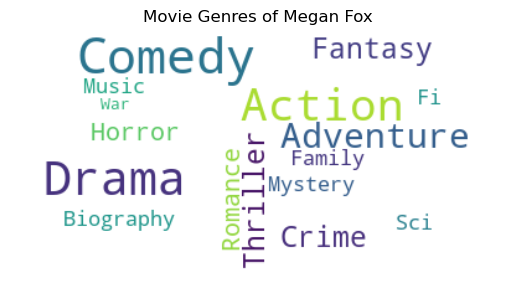

In [37]:
#wordcloud of all genres an actor acted in

from wordcloud import WordCloud

selected_actor = selected_actor = input('\nTo Find Out What Genres an Actor Has Acted In:\nEnter the Name of an Actor/Actress: \n')
actor_data = movies_csv[movies_csv['Actor'] == selected_actor]


if 'Genre' in actor_data.columns:
    genres_combined = ' '.join(actor_data['Genre'].astype(str).str.replace("'", "").str.strip())

    #generate the word cloud
    wordcloud = WordCloud(max_font_size=40, background_color='white').generate(genres_combined)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Movie Genres of {selected_actor}")
    plt.axis("off")
    plt.show()

## 6A. Rating of Specifc Actor's movies (each year)


What is the Rating of an Actor's Alltime Movies, Per Year:
Enter the Name of an Actor/Actress: 
 Scarlett Johansson


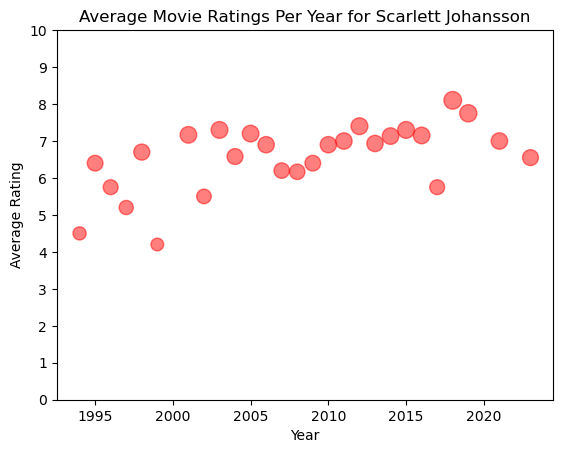


Average Rating by Year:



,Rating
Year,
1994,4.5
1995,6.4
1996,5.8
1997,5.2
1998,6.7
1999,4.2
2001,7.2
2002,5.5
2003,7.3


In [39]:
#average rating of every movie an actor acted in, 

selected_actor = selected_actor = input("\nWhat is the Rating of an Actor's Alltime Movies, Per Year:\nEnter the Name of an Actor/Actress: \n")
actor_data = movies_csv[movies_csv['Actor'] == selected_actor]

avg_rating = actor_data.groupby('Year')['Rating'].mean().reset_index()
avg_rating.columns = ['Year', 'Average Rating']

#creating the scatter plot
plt.figure()
plt.scatter(
    x=avg_rating['Year'],
    y=avg_rating['Average Rating'],
    s=avg_rating['Average Rating'] *20,
    color = 'red',
    alpha =0.5
)
plt.title(f"Average Movie Ratings Per Year for {selected_actor}")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.yticks(range(0, 11))
plt.ylim(0, 10)
plt.show()

# Average rating by year rouned to one decimal place
print("\nAverage Rating by Year:\n")
rating_by_year = actor_data.groupby('Year')['Rating'].mean().round(1)

#make output nicer and more readable
rating_by_year_html = rating_by_year.to_frame().to_html(index=True)
display(HTML(f'<div style="font-size:20px">{rating_by_year_html}</div>'))
#print(rating_by_year.to_string())



## 6B. Average rating of their movies (overall)

In [40]:
#average overall rating of an actor, based on their movie ratings

selected_actor = selected_actor = input("\nWhat is the Rating of an Actor's Alltime Movies, Overall:\nEnter the Name of an Actor/Actress: \n")
actor_data = movies_csv[movies_csv['Actor'] == selected_actor]

overall_avg = movies_csv['Rating'].mean().round(1)

overall_avg_df = pd.DataFrame({'Actor': [selected_actor], 'Overall Average Rating': [overall_avg]})
#make output nicer and more readable
overall_avg_html = overall_avg_df.to_html(index=False)
display(HTML(f'<div style="font-size:20px">{overall_avg_html}</div>'))


What is the Rating of an Actor's Alltime Movies, Overall:
Enter the Name of an Actor/Actress: 
 Sandra Bullock


Actor,Overall Average Rating
Sandra Bullock,6.3


## 7. Top 5 Movies, their respective years and genre


To View The Top 5 Movies of a Specific Actor:
Enter the Name of an Actor/Actress: 
 Charlize Theron


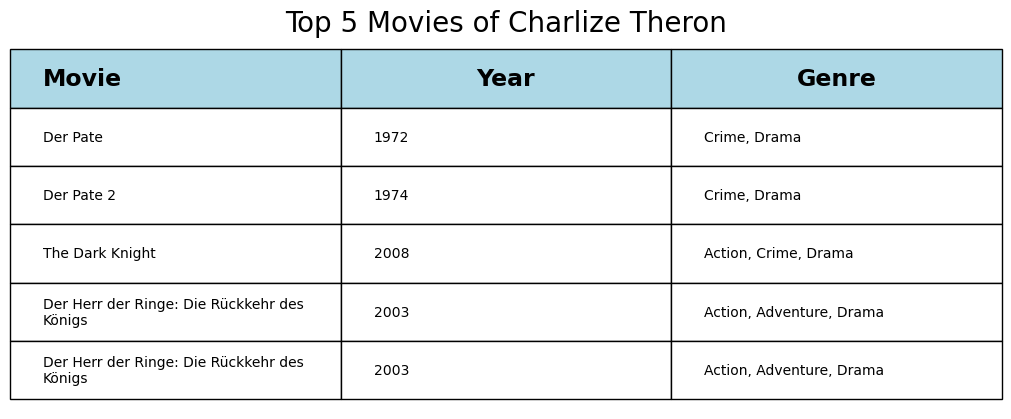

In [41]:
#an actor's top 5 movies (based on rating), along with the year and genre of those movies

selected_actor = selected_actor = input("\nTo View The Top 5 Movies of a Specific Actor:\nEnter the Name of an Actor/Actress: \n")
actor_data = movies_csv[movies_csv['Actor'] == selected_actor]

top5 = movies_csv.nlargest(5, 'Rating')[['Movie', 'Year', 'Genre']]

#create a table to display the data
fig, ax = plt.subplots()


# Convert top5 DataFrame to a list of lists for table cellText
table_data = top5.values.tolist()

#remove quotes and brackets from genre
for row in table_data:
    row[2] = row[2].replace("'", "").replace("[","").replace("]","")

# textwrap the movie titles
for row in table_data:
    row[0] = '\n'.join(textwrap.wrap(row[0], width=40))  # Adjust width as needed

#design the table
table = ax.table(cellText=table_data,
                colLabels=top5.columns,
                loc='center',
                cellLoc='left',
                colColours=['lightblue']*len(top5.columns),
                cellColours=[['white']*len(top5.columns) for _ in range(len(top5))],
                #edges='open'
                #colWidths
             )

#style the table
table.auto_set_font_size(False)
table.set_fontsize(10) #cell text sixe
table.scale(2,3.5)

#set different font size for headers
for key, cell in table.get_celld().items():
    if key[0] ==0:
        cell.set_text_props(weight='bold', fontsize=17)

#adjusting text alignment
for key, cell in table.get_celld().items():
    if key[1] == 0:
        cell.set_text_props(ha='left', ma='left')

# Hide axes
ax.axis('off')

plt.title(f"Top 5 Movies of {selected_actor}", fontsize=20)
plt.show()